<a href="https://colab.research.google.com/github/ajayn3300/Capstone-Project-Regression/blob/main/Rossmann_Sales_Prediction_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns 
plt.rcParams['figure.figsize']=(10,6)
pd.set_option('display.max_columns',30)
plt.rcParams['agg.path.chunksize'] = 10000

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Let's import our data first and get to know about our data:** 

In [5]:
#rossmann data: includes historical data
rossmann=pd.read_csv('/content/drive/MyDrive/Data _ Resources/Rossmann Stores Data.csv')
store=pd.read_csv('/content/drive/MyDrive/Data _ Resources/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
#head of the rossmann data
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
#shape of rossmann data
rossmann.shape

(1017209, 9)

In [8]:
# head of store data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# shape of store data
store.shape

(1115, 10)

In [10]:
#description of  rossmann data
rossmann.describe(percentiles=[0.25,.50,.75,0.90])

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
90%,1.004000e+03,7.000000e+00,1.028800e+04,1.116000e+03,1.000000e+00,1.000000e+00,1.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
#info of data 
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
# no. of stores we have
rossmann.Store.nunique()

1115

In [13]:
#highest sales 
rossmann.Sales.max()

41551

In [14]:
#description of store data
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


*we can get some statistical information from here this :*


In [15]:
#maximim competetor distance :you can see this in upward frame
store.CompetitionDistance.max()

75860.0

In [16]:
# average year  from which stores have competiton 
2006

2006

In [17]:
#info of data
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Data wrangling  and Feature Engineering:
***getting data ready for further process:***


In [18]:
#data info
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


  **date** column's dtype is object we need to change it and **StateHoliday** contain binary ,but dtype is object.Let's change them 

In [19]:
#changing data type of date column from object to datetime
rossmann['Date']=pd.to_datetime(rossmann.Date)

In [20]:
# let's check again 
rossmann.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [21]:
# for Rossmann data

#checking duplicates values 
rossmann[rossmann.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


no duplicates

In [22]:
#checking null values
rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

***no null values***

In [23]:
#for store data 
#head of the data
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:

#checking duplicates
store[store.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


no duplicates

In [25]:
#info of the data
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [26]:
#checking null values
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

null values are present let's see what we can do

see here we have null values in all rows and we have exact 1115 stores, if we remove them we will loose whole data.
Let's fill the nan values with 0

In [27]:
#let's fill nan values with 0
store=store.fillna(0)

In [28]:
#let's check again
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

***Intuition behind filling null values with zeros :*** As we saw above ,column **CompetitionOpenSinceMonth** and **CompetitionOpenSinceYear** have same amount of null values ,so there could be a posibility that these store which don't have competition open since year also don't have competition open since month,same as with other columns containing null values. 

In [29]:
#let's hot encode these holidays into numbers
stateholi={'0':0,
          0:0,
          'a':1,
          'b':2,
           'c':3}

In [30]:
rossmann['StateHoliday']=rossmann['StateHoliday'].apply(lambda x:stateholi[x])

**2 colums in store data need hot encoding**

In [31]:
# store type
storetype={'a':1,'b':2,'c':3,'d':4}
store['StoreType']=store['StoreType'].apply(lambda x :storetype[x])

In [32]:
# for Assortment level
assortment={'a':1,'b':2,'c':3}
store['Assortment']=store['Assortment'].apply(lambda x:assortment[x])


# **:>  Checking outliers in our data**


   **Let's join our both datasets** 

In [33]:
#join
df=pd.merge(rossmann,store,how='outer',on='Store')

In [34]:
# adding day,month and year columns to 'df' dataframe
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year


In [35]:
# features names
x_names=set(df.describe().columns)-{'Store','Sales'}
y_names='Sales'

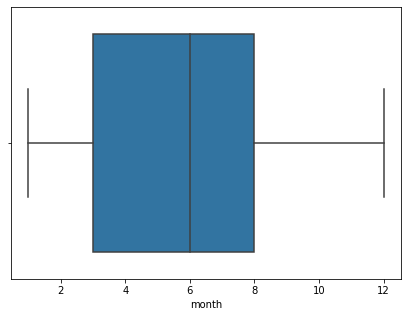

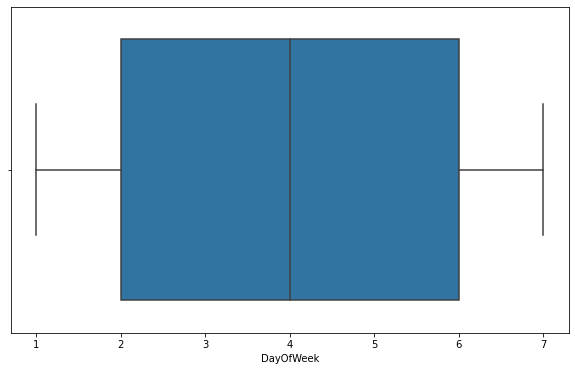

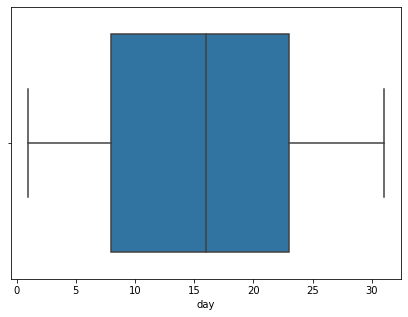

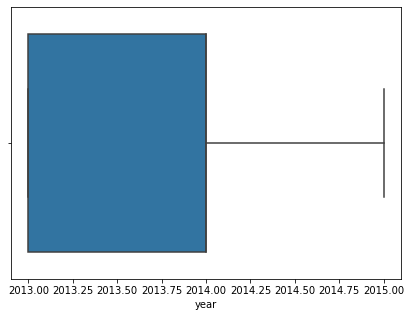

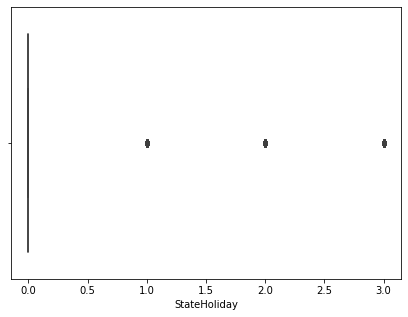

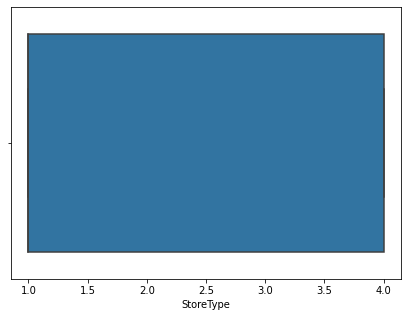

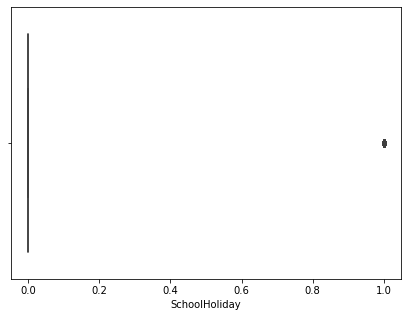

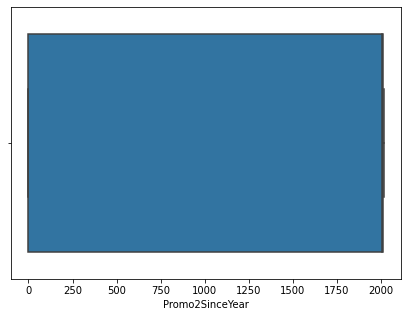

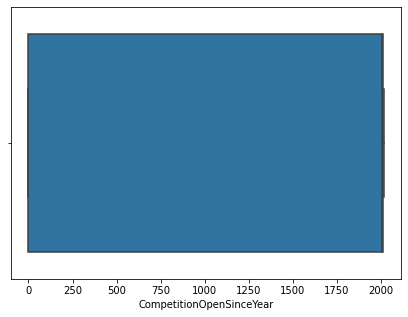

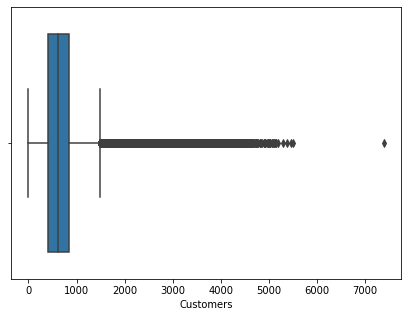

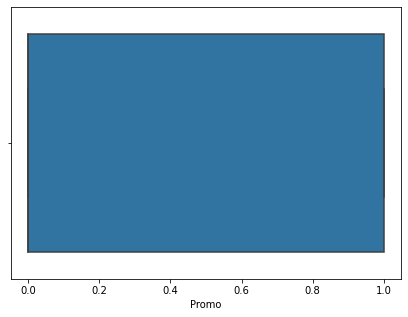

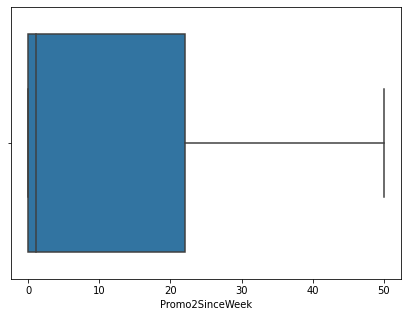

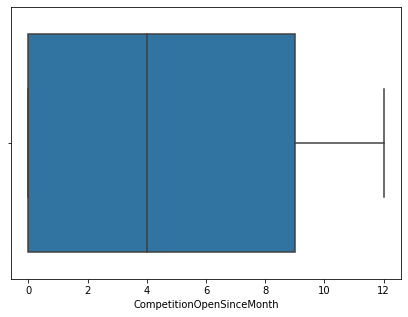

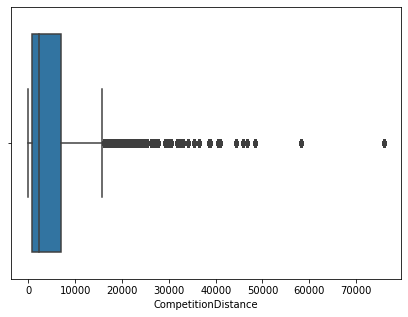

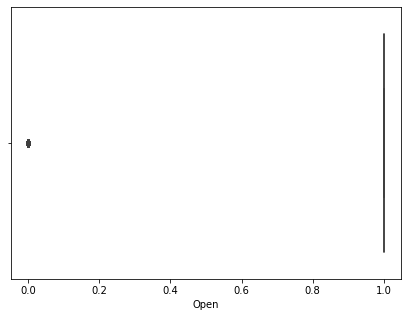

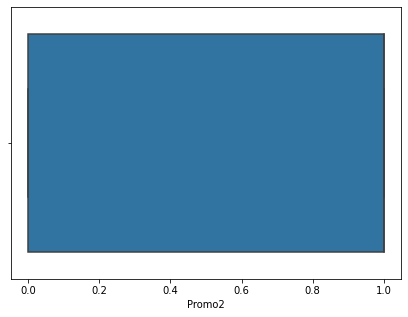

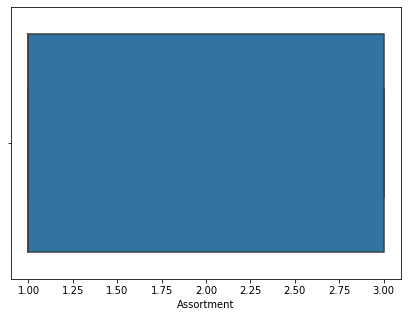

<Figure size 504x360 with 0 Axes>

In [36]:
#checking ouliers in  our independent variables using box plot
for i,j in enumerate(x_names):
    plt.figure(figsize=(7,5))
    plt.figure(i)
    sns.boxplot(x=j,data=df)

        There are two variables which have outliers :
                                                        1.Customers
                                                        2.CompetetionDistance

In [37]:
#removing outliers

df=df[df['Customers']<2000]  #dataset with only customers less than 2000

df=df[df['CompetitionDistance']<20000] #dataset with only CompetetionDistance less than 20000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


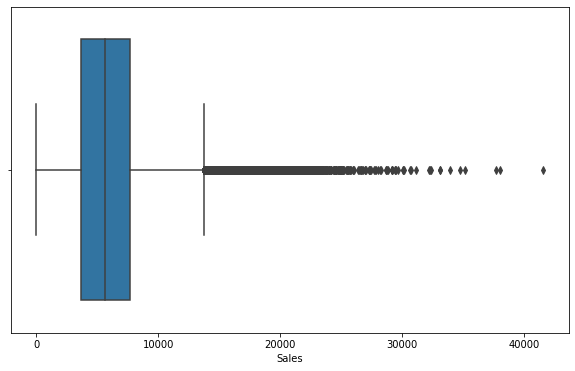

In [38]:
#creatnig boxplot
sns.boxplot(df['Sales'])

*Till now all seems good,further alterations will be done as per requirement*

# **Explorartory data analysis 
this will include steps like getting some information about data and visualizing them 

In [39]:
# time period of the data we have
print('The data we have is between {}  and {} '.format(min(df.Date),max(df.Date)))

The data we have is between 2013-01-01 00:00:00  and 2015-07-31 00:00:00 


      approx 2.7 years

In [40]:
# types of state holidays
df.StateHoliday.unique()

array([0, 1, 2, 3])

    1 = public holiday, 2 = Easter holiday, 3 = Christmas, 0 = None

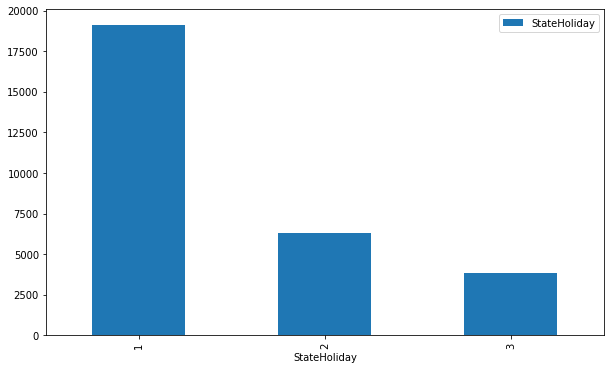

In [41]:
#let's check most no. of StateHolidays we have during these years
df[df['StateHoliday']!=0].groupby(['StateHoliday'])['StateHoliday'].count().plot(kind='bar')
plt.legend()



    1= public holiday, 2= Easter holiday, 3= Christmas 
    
  **So many public holidays**

In [42]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015
1,1,4,2015-07-30,5020,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,30,7,2015
2,1,3,2015-07-29,4782,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,29,7,2015
3,1,2,2015-07-28,5011,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,28,7,2015
4,1,1,2015-07-27,6102,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,27,7,2015


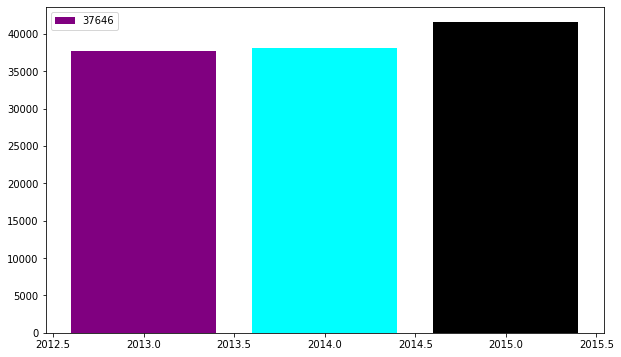

In [43]:
#which year have the highest sales
sh=df.groupby(['year'])['Sales'].max().reset_index().set_index(['year'])
plt.bar(sh.index,sh.Sales,color=['purple','cyan','black'])
plt.legend(list(sh.Sales))

     Even we have only 7 months of data of year 2015,still highest sales !! 

Text(0.5, 0, '<-------------year--------------->')

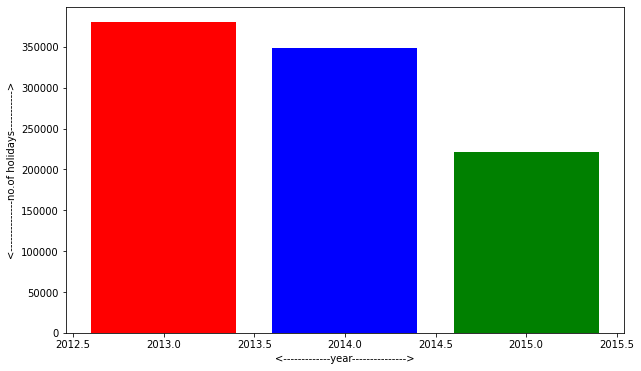

In [44]:
ys=df.groupby(['year'])['StateHoliday'].count().reset_index()
plt.bar(ys['year'],ys['StateHoliday'],color=['red','blue','green'])
plt.ylabel('<--------------no.of holidays----------->')
plt.xlabel('<-------------year--------------->')

      year 2015 have highest sales because it has least numbers of holidays 

In [45]:
#no. of year we have 
df.year.unique()

array([2015, 2014, 2013])

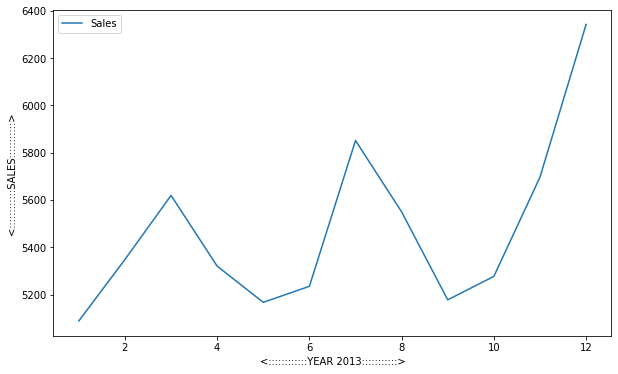

In [46]:
# sales in year 2013
df[df['year']==2013].groupby(['month']).mean()['Sales'].plot(kind='line')
plt.xlabel('<::::::::::::YEAR 2013:::::::::::>')
plt.ylabel('<::::::::::::SALES:::::::::::>')
plt.legend(['Sales'],loc=2)

            At the mid of the year ,sales were highest 

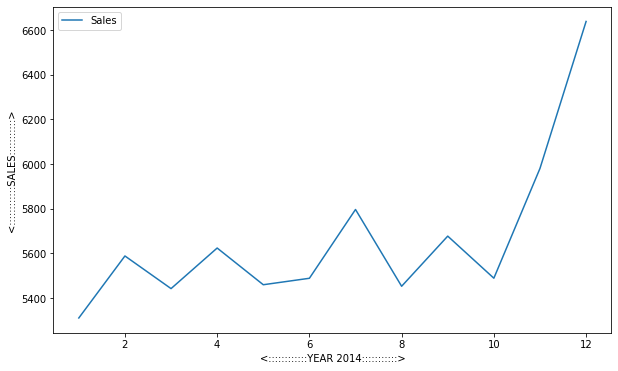

In [47]:
# sales in year 2014
df[df['year']==2014].groupby(['month']).mean()['Sales'].plot(kind='line')
plt.xlabel('<::::::::::::YEAR 2014:::::::::::>')
plt.ylabel('<::::::::::::SALES:::::::::::>')
plt.legend(['Sales'],loc=2)

     Here , sales were highest at the end of year

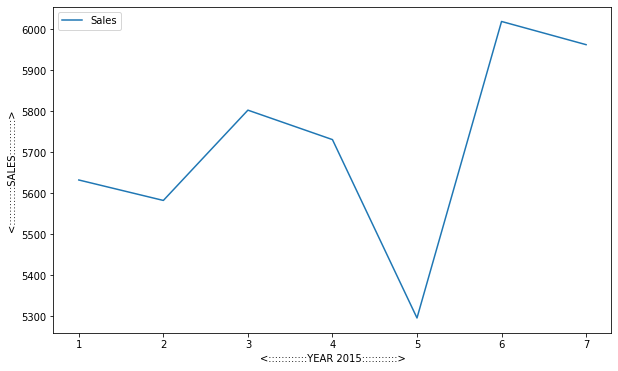

In [48]:
# sales in year 2015
df[df['year']==2015].groupby(['month']).mean()['Sales'].plot(kind='line')
plt.xlabel('<::::::::::::YEAR 2015:::::::::::>')
plt.ylabel('<::::::::::::SALES:::::::::::>')
plt.legend(['Sales'],loc=2)

Text(0, 0.5, '<--------Customers....-----.')

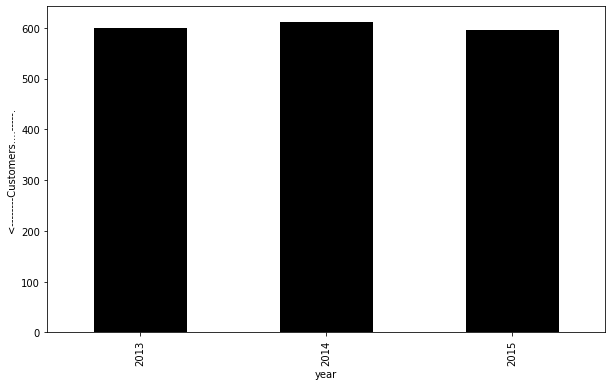

In [49]:
# hihghest numbers of customers in years
df.groupby('year')['Customers'].mean().plot(kind='bar',color='black')
plt.ylabel('<--------Customers....-----.')

          We have only 7 month of data for year 2015

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


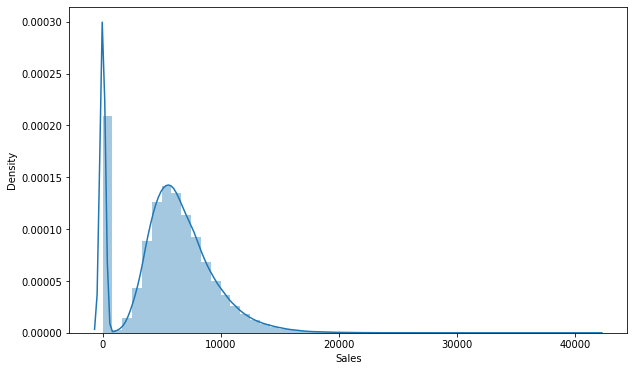

In [50]:
# plotting our dependent variable which is Sales
sns.distplot(df['Sales'])

      positively skewed ,need to use tranformation techniques and need to remove 0 values from variables

In [51]:
#checking data
df['Sales'].min()

0

            we can remove sales with zeros becoz there is no sales due to holiday ,there are also some example with sales 0 we will also remove them

In [52]:
# new dataste
df=df[df['Sales']!=0]

In [53]:
#check
df['Sales'].min()

124

In [54]:
# transformation of our dependent variable
df['Sales']=np.sqrt(df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


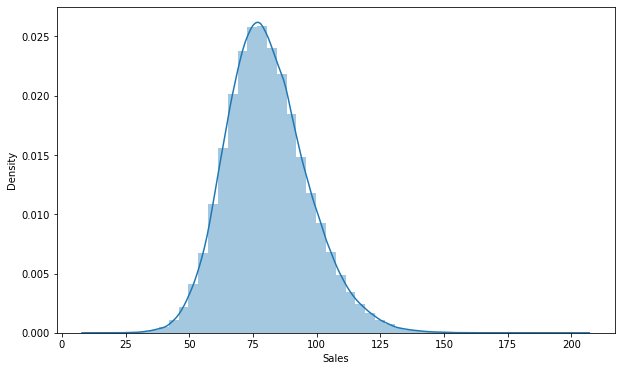

In [55]:
#let's plot
sns.distplot(df['Sales'])

       Now it it perfectly shaped

# Plotting correlation between dependent and independent variable using scatter plot ;>

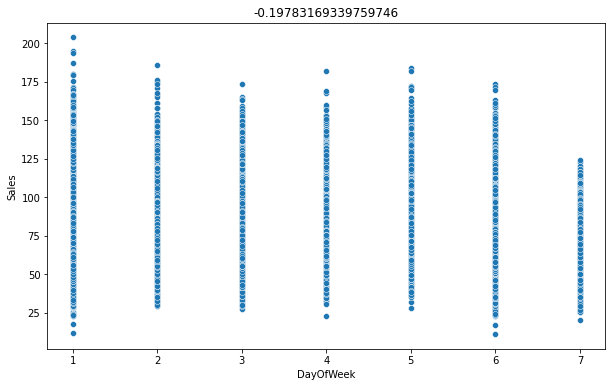

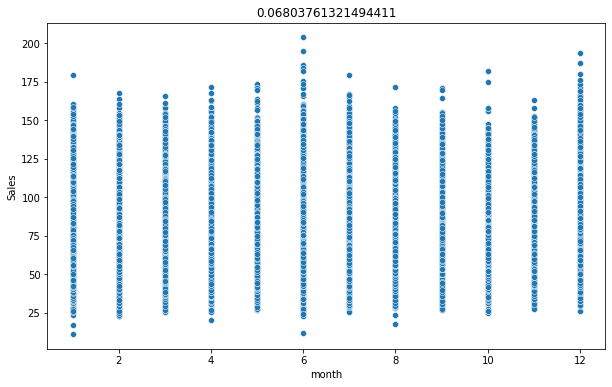

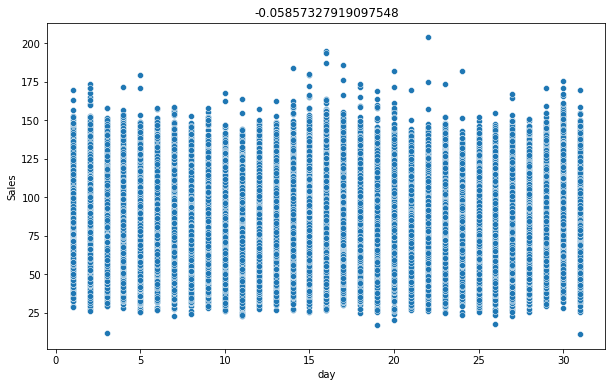

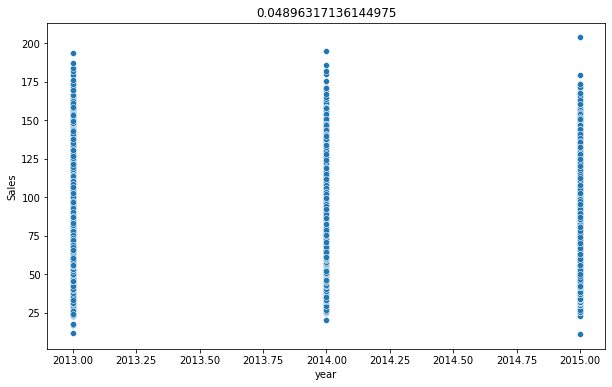

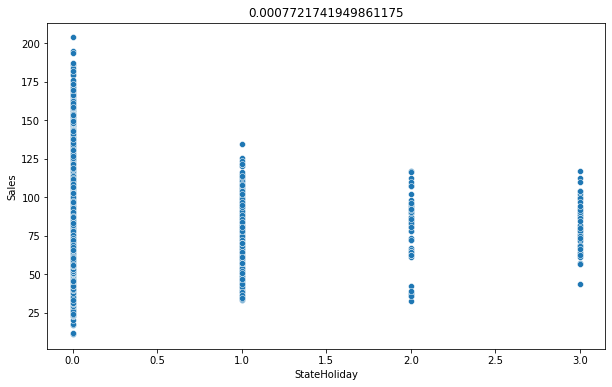

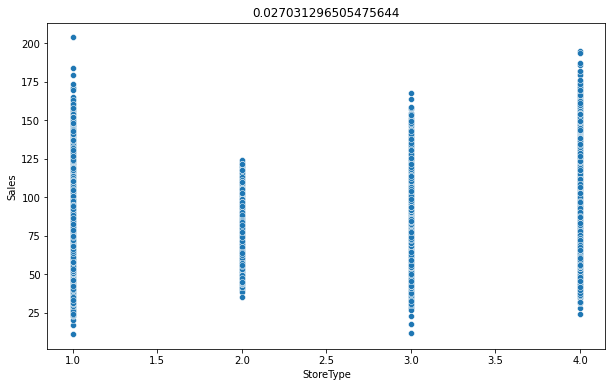

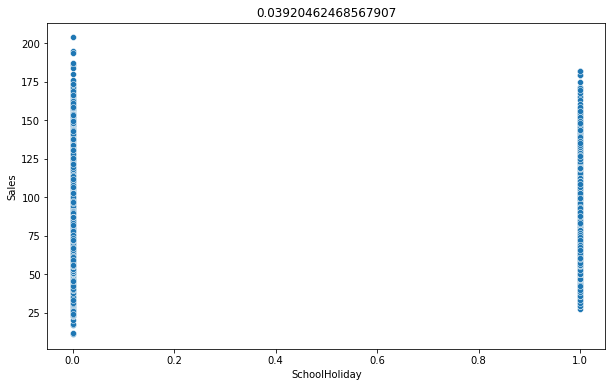

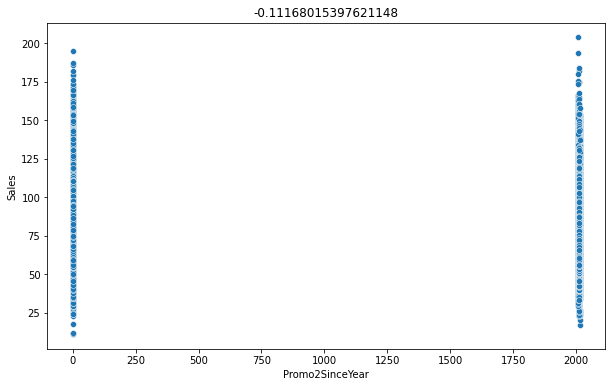

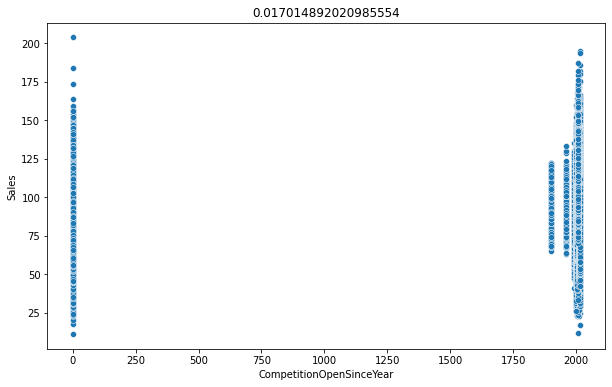

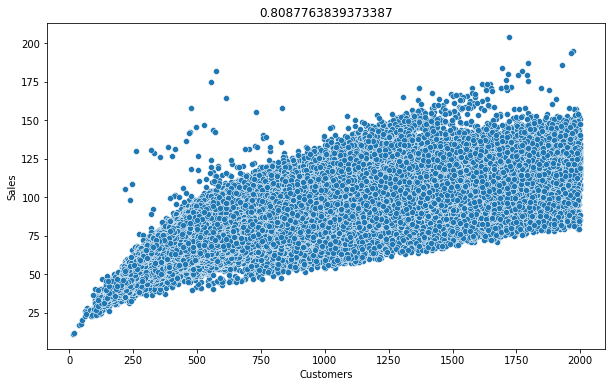

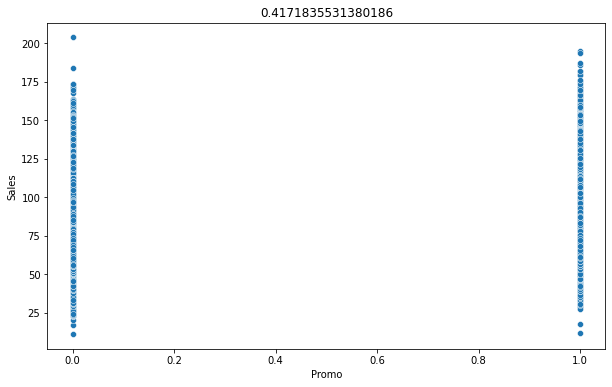

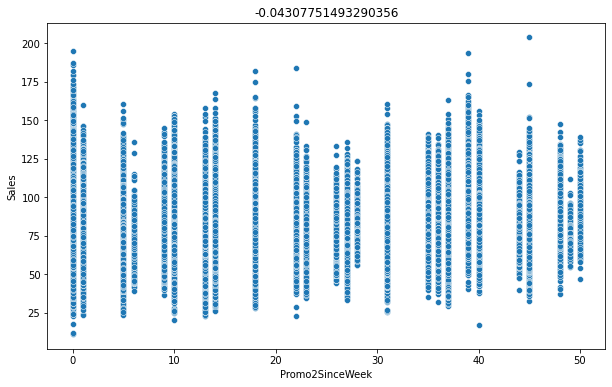

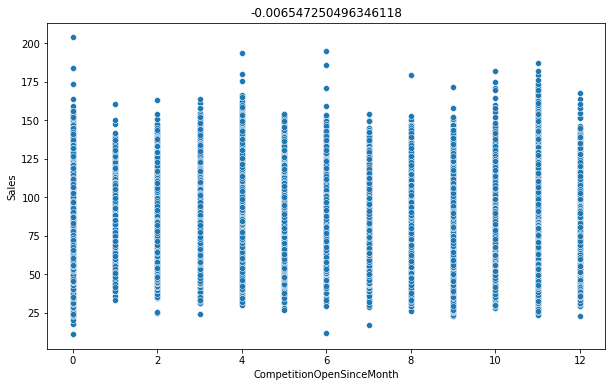

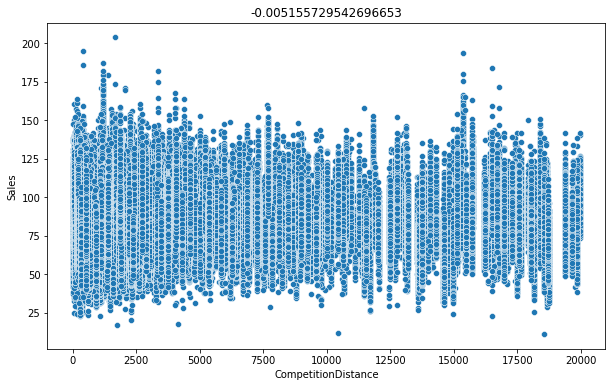

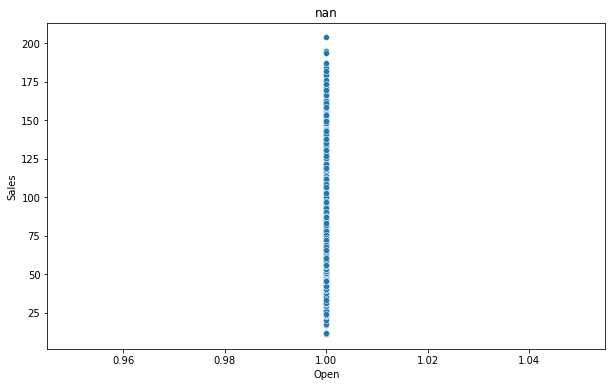

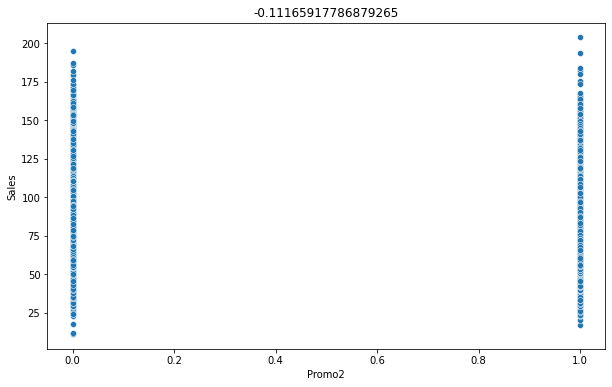

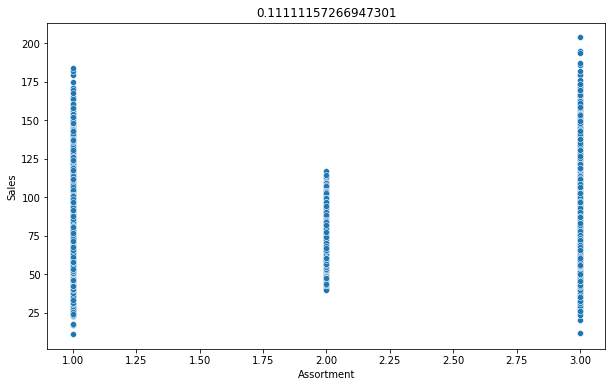

In [56]:
#plot
for i ,j in enumerate(x_names):
    plt.figure(i)
    sns.scatterplot(x=j,y='Sales',data=df)
    plt.title(df[j].corr(df['Sales']))

# Plotting relation between independent variable using heatmap 

**Checking Multicolinearity**

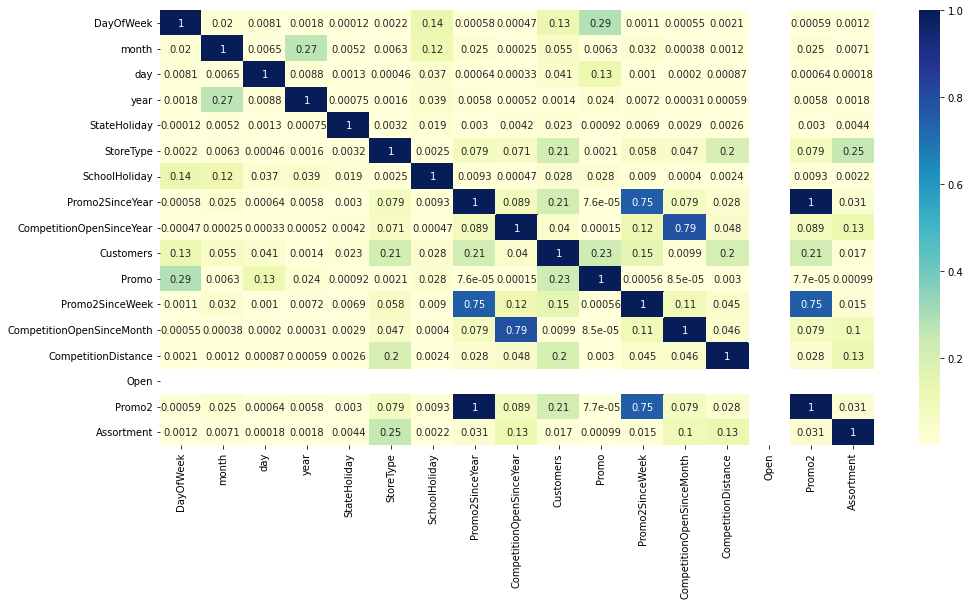

In [57]:
# Let's plot
plt.figure(figsize=(16,8))
corr=df[x_names].corr()
sns.heatmap(abs(corr),annot=True,cmap='YlGnBu')

        we will remove those features which have high correlation with each other features  eg.
                                                                                              1.Promo2
                                                                                              2.CompetitionOpenSinceYear
                                                                                              3.Promo2SinceYear
                                                                                              4.Promo2SinceYear
                                                                                              5.Open
                                                                                              6.StateHoliday
                                                                                              7.SchoolHoliday

In [58]:
# let's drop; these features
x_names=x_names-{'Promo2','CompetitionOpenSinceYear','Promo2SinceYear','Open'}

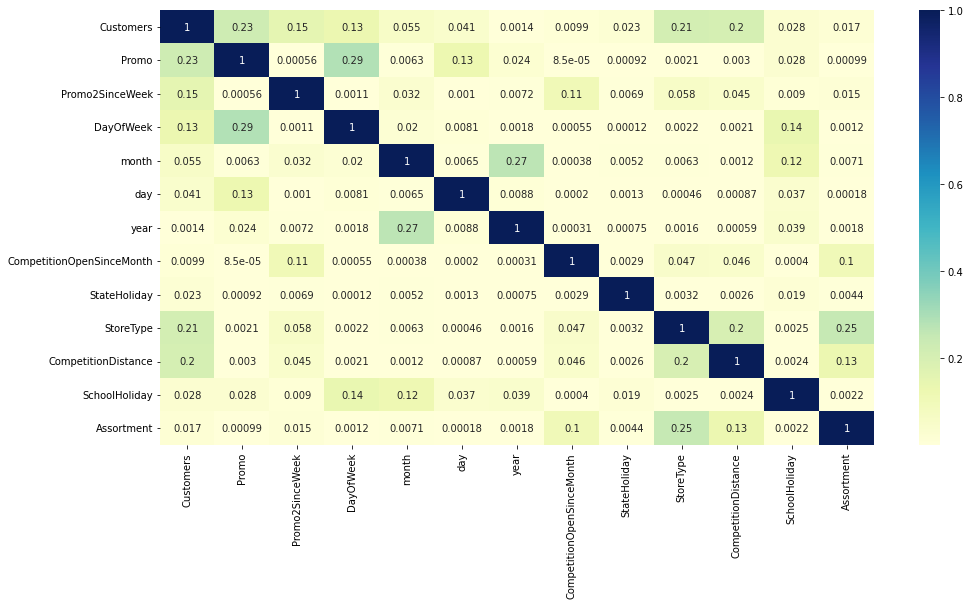

In [59]:
#let plot again
plt.figure(figsize=(16,8))
corr=df[x_names].corr()
sns.heatmap(abs(corr),annot=True,cmap='YlGnBu')

        Good to go

# ***Normalizing  input data***


In [60]:
#library
from sklearn.preprocessing import StandardScaler 

In [61]:
# intiate scaler for normalizing inputs
scaler=StandardScaler()
x=scaler.fit_transform(df[x_names])

In [62]:
x.shape

(785058, 13)

In [63]:
y=df['Sales']

**Splitting data into trainig and test**

In [64]:
#library
from sklearn.model_selection import train_test_split

In [65]:
#let's split
x_train,x_test,y_train,y_train =train_test_split(x,y,test_size=0.2,random_state=1)

In [66]:
# shapes of data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(628046, 13)
(628046,)
(157012, 13)
(157012,)


#  Applying Linear Regression :


In [67]:
#library
from sklearn.linear_model import LinearRegression

In [68]:
#initiate model
model=LinearRegression().fit(x_train,y_train)

In [69]:
# coef's 
model.coef_

array([13.35084027,  3.52493956,  1.36827147, -0.40456131,  0.65163955,
        0.04746429,  0.87186299,  0.24295376, -0.27443975,  2.51966475,
        2.07196392,  0.08188111,  1.14375232])

In [70]:
#let's predict
rfr.predict(x_train)=model.predict(x_test)

#  Regression Evaluation  

**On test data**

In [71]:
#Library
# MSE  MAE RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error

MSE=mean_squared_error(y_test,y_preds)
print('MSE :',MSE)

MAE=mean_absolute_error(y_test,y_preds)
print('MAE :',MAE)

RMSE=np.sqrt(mean_squared_error(y_test,y_preds))
print('MSE :',RMSE)

MSE : 57.96480888763818
MAE : 5.804022454787529
MSE : 7.613462345584837


In [72]:
#Library
# R2 score
from sklearn.metrics import r2_score
r2=r2_score(y_test,rfr.predict(x_train))
print('Accuracy on test data:',r2)

Accuracy on test data: 0.7777734644623331


**on train data**

In [73]:
#Accuracy on train data
train_preds=model.predict(x_train)
print('Accuracy on train data is :{}'.format(r2_score(y_train,train_preds)))

Accuracy on train data is :0.7781698133549312


In [74]:
#train data
MSE=mean_squared_error(y_train,train_preds)
print('MSE on train data:',MSE)

MAE=mean_absolute_error(y_train,train_preds)
print('MAE on train data:',MAE)

RMSE=np.sqrt(mean_squared_error(y_train,train_preds))
print('MSE on train data:',RMSE)

MSE on train data: 57.71339238793002
MAE on train data: 5.784235154598549
MSE on train data: 7.5969330909209685


# Residual Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Plot')

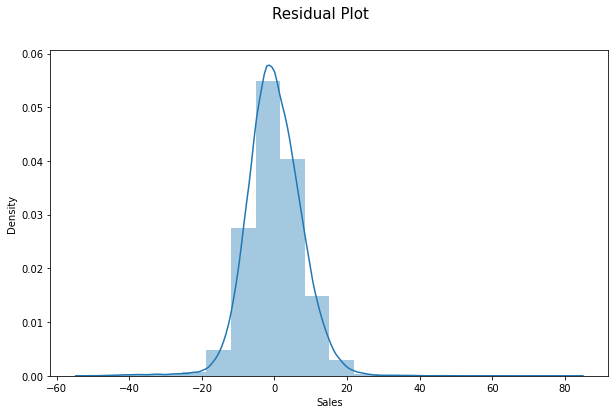

In [75]:
# plotting residual analysis
sns.distplot((y_test-rfr.predict(x_train)),bins=20)
plt.suptitle('Residual Plot',fontsize=15)

# Heteroscedasticity

Text(0.5, 0.98, 'Heteroscedasticity')

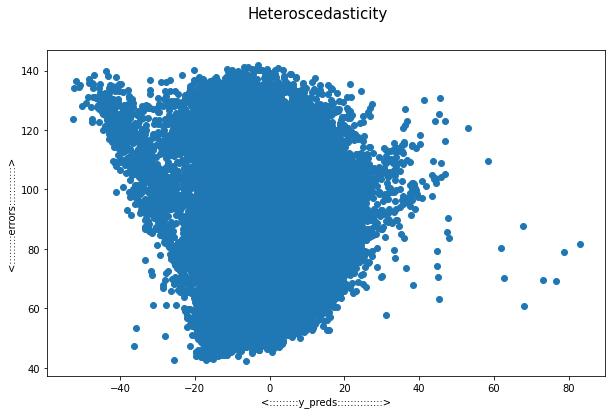

In [76]:
# hetersoscedasticity
errors=y_test-rfr.predict(x_train)
plt.scatter(errors,rfr.predict(x_train))
plt.xlabel('<:::::::::rfr.predict(x_train)::::::::::::::>')
plt.ylabel('<:::::::::errors::::::::::::>')
plt.suptitle('Heteroscedasticity',fontsize=15)

# Let's apply some Ensembling Techniques

**Bagging Technique :** ***Random Forest***

In [82]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor  #lib import 
rfr=RandomForestRegressor()   #initiating model class
rfr.fit(x_train,y_train)     #fitting the data

RandomForestRegressor()

In [86]:
# r2 score on train data
r2_score(y_train,rfr.predict(x_train))

0.9960741168714183

        As we already know ,RadomForest fits very well in training data,let's check on test data 

In [87]:
# r2 score for test data 
r2_score(y_test,rfr.predict(x_test))

0.9722165320408522

      RandomForest has done very well also on test data.

In [90]:
# MSE  MAE RMSE train data

MSE=mean_squared_error(y_train,rfr.predict(x_train))
print('MSE :',MSE)

MAE=mean_absolute_error(y_train ,rfr.predict(x_train))
print('MAE :',MAE)

RMSE=np.sqrt(mean_squared_error(y_train ,rfr.predict(x_train)))
print('MSE :',RMSE)

MSE : 1.0213940532426753
MAE : 0.7226730937682387
MSE : 1.0106404173803238


In [92]:
# MSE  MAE RMSE test data

MSE=mean_squared_error(y_test,rfr.predict(x_test))
print('MSE :',MSE)

MAE=mean_absolute_error(y_test,rfr.predict(x_test))
print('MAE :',MAE)

RMSE=np.sqrt(mean_squared_error(y_test,rfr.predict(x_test)))
print('MSE :',RMSE)

MSE : 7.246944684582224
MAE : 1.9428748352289882
MSE : 2.6920149859505282


      Random Forest is doing great

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Plot (Random Forest)')

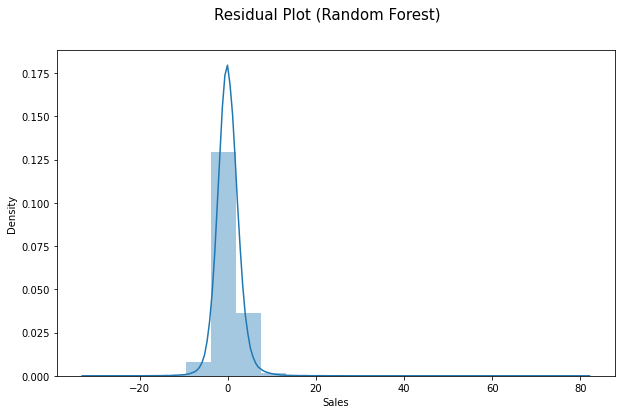

In [94]:
# Residual plot with RandomForest
sns.distplot((y_test-rfr.predict(x_test)),bins=20)
plt.suptitle('Residual Plot (Random Forest)',fontsize=15)

Text(0.5, 0.98, 'Heteroscedasticity   (RandomForest)')

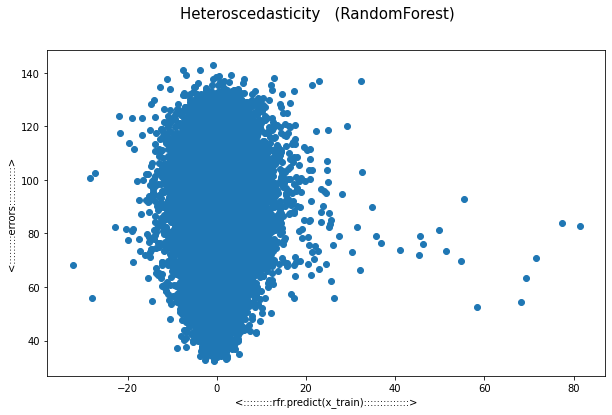

In [95]:
# hetersoscedasticity with RAndomForest
plt.scatter(y_test-rfr.predict(x_test),boost.predict(x_test))
plt.xlabel('<:::::::::rfr.predict(x_train)::::::::::::::>')
plt.ylabel('<:::::::::errors::::::::::::>')
plt.suptitle('Heteroscedasticity   (RandomForest)',fontsize=15)